### <i>Note: this source code is also available in main.py</i>

In [1]:
# -*- coding: utf-8 -*-
from objectives import * 
from read_input import *
from plotting import *
from reformulation_input import *

%matplotlib inline
PYTHONIOENCODING="utf-8"

D:\Software\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Define the scenario and optimize the keyboard
Here you can define: 
- the weights for each objective
- the <code>level cost</code> used in familiarity objective

In addition, the system will use the following input files from folder <code>input </code>:

<code>azerty.csv </code><br>
<i> Do not change. </i>Defines the location of each character on the current azerty layout. Used in familiarity score.

<code>numbers.csv </code><br>
<i> Can be changed. </i>Defines the keys that are reserved for numbers. Change to fix the numbers to other keyslots (e.g. unshifted) or add other fixed characters. Characters added here will be fixed to the given keyslot and not considered in the optimization (also not influence the location of other keys).

<code>characters.txt </code><br>
<i> Can be changed. </i>A list of characters that should be mapped on the keyboard. Remove or add characters as you like. If you add a character, ensure that its probability and similarity scores are defined.
**Do not add characters from the alphabet or space.**

<code>variable slots </code><br>
A list of all free slots to which the characters can be assigned during optimization. Usually this file does not need to be changed. Any character you want to fix you can add to <code>numbers.csv</code> and will be automatically removed from this list. However, if you want to completely remove a slot from the optimization, you can do it here (e.g. <code>A03_Alt</code> to not allow any assignment to <code>Alt + Space</code>)

<code>letters.txt </code><br>
<i> Do not change. </i>A list of letters that are fixed on the keyboard according to the azerty layout (<code>azerty.csv </code>). Characters are optimized in relation to these fixed letters. Our collected data (e.g. performance data) does not allow to change this set. If you want to fix a character to a certain key, remove that character from the <code>characters.txt </code> and add it to <code>numbers.csv </code><br>. Then the key won't be considered by the optimization. However, it will also not influence the assignment of other keys

<code>distance.xlsx </code><br>
<i> Can be changed. </i>Matrix that defines the distance between two keyslots as the sum of row and column distance. An extra level cost (Shift, Alt, Alt+Shift) is taken into account in the familiarity score and can be defined in the scenario. The distance is normalized to [0,1] when reading the distance matrix. 

<code>similarity_c_c.xlsx</code> and <code>similarity_c_l.xlsx</code><br>
<i> Can be changed. </i>Matrix that defines the similarity between two characters or for a character-letter pair. The similarity is given between 0 and 1. This is a symmetric score, and the value should only be filled once!

<code>all_slots.txt</code><br>
<i> Do not change. </i> Contains all keyboard slots. Only relevant for plotting. 

In [2]:
#Define the weights for:
#w_p: Performance
#w_a: Association
#w_f: Familiarity
#w_e: Ergonomics
w_p, w_a, w_f, w_e = [0.25, 0.25, 0.25, 0.25]


#Define the extra cost for the level of the keyslot added when computing the distance between two keyslots. 
# This is used in familiarity score to punish the assignment to other levels as used on azerty.
#Example: 
#level_cost = {u'':0, u'Shift':1, u'Alt':2, u'Alt_Shift':3}
#distance[E_00, E_00_Alt] = 2
#distance[E_00_Shift, E_00_Alt] = 1
level_cost = {u'':0, u'Shift':1, u'Alt':2, u'Alt_Shift':3}

### Create input for reformulation
In order for it to run fast, we need to reformulate the problem to the kaufmann-broekx reformulation. The reformulation itself is done with the C++ code provided by Andreas Karrenbauer. Here, we only prepare the input file for this code. 

In [3]:
create_reformulation_input(w_p, w_a, w_f, w_e, level_cost)

read in: characters, keyslots and letters
read in: similarity values
read in: distance values


KeyboardInterrupt: 

### Optimize reformulation
Note: reformulation.lp must be created by Andreas' C++ code prior to calling the optimization.

Runs the optimization and saves the global optimum to a file. 
Also saves intermediate solutions to the <code> mappings </code> folder

In [ ]:
from optimize import *
model, mapping = optimize_reformulation("reformulation\\reformulation.lp")

### Compute the objectives of a given mapping
Given a mapping (dict from characters to keyslots) we can compute the values for each objective. The mapping can come from a file or an optimization. Use <code>create_map_from_reformulation</code> if you want to read in an .mst file produced by the optimization of the reformulation.

In [ ]:
mapping = get_azerty()

get_objectives(mapping, w_p, w_a, w_f, w_e, level_cost, quadratic=1)
                               

read in: characters, keyslots and letters
read in: similarity values
read in: distance values
´d composes í
´d composes á
`d composes è
`d composes ù
^d composes ê
^d composes ô
^d composes û
^d composes î
^d composes â
¨d composes ï
¨d composes ö
¨d composes ü
¨d composes ë
Done reading input values.
0.300887704505


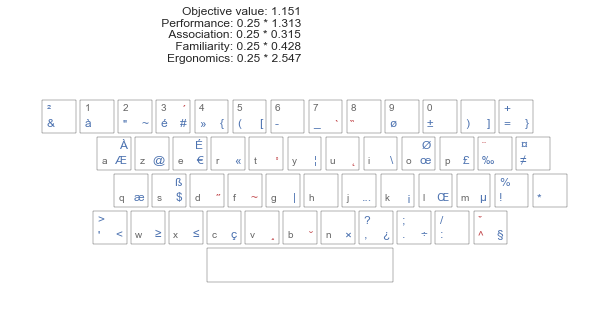

In [4]:
path = "mappings\\solution_1.1507.mst"
plot_mapping(path, plotname=path+".png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, level_cost=level_cost, quadratic=1)